Polynomial Linear Regression 
y = b0 + b1x1 + b2x1^2 + b3x1^3 + ........+ bnx1^n

data set - we are an hr, we have this data ...so there is one new employee to be hired and when the discussion comes to salary..so we can use this to predict the previous salary of the employee to offer him/ her the new salary package

so the dataset contains his/her previous company salary package . so if person works as region manager , their salary should be 150000...but that person has worked in this position for quiet long ...say 3 years...the salary will be somewhere in between 150000 and the next psoition of partner i.e., 200000. so we have to find this out . so the  position can be considered as level 6.5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set = pd.read_csv('Position_Salaries.csv')

In [3]:
data_set.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
X = data_set.iloc[:,1:-1].values
y = data_set.iloc[:, -1].values
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [8]:
#trying linear regression model on this to see, we training on all the data
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(X,y)

LinearRegression()

In [12]:
##trying polynomial regression model on this to see, we training on all the data
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)

In [14]:
X_poly = pf.fit_transform(X)
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


thsi contains new set of features such that level , level^2, level^3 etc based on the degree given

In [17]:
lr2 = LinearRegression()
lr2.fit(X_poly,y)


LinearRegression()

Text(0, 0.5, 'predicted salary ')

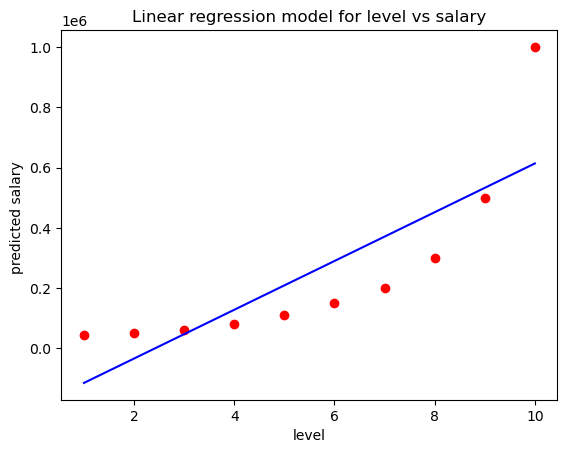

In [21]:
linear_pred = lr.predict(X)

plt.scatter(X , y , color = 'red') #plot of the real levels and actual salaries for linear model
plt.plot(X, linear_pred , color = 'blue')
plt.title('Linear regression model for level vs salary')
plt.xlabel('level')
plt.ylabel('predicted salary ')


Text(0, 0.5, 'predicted salary ')

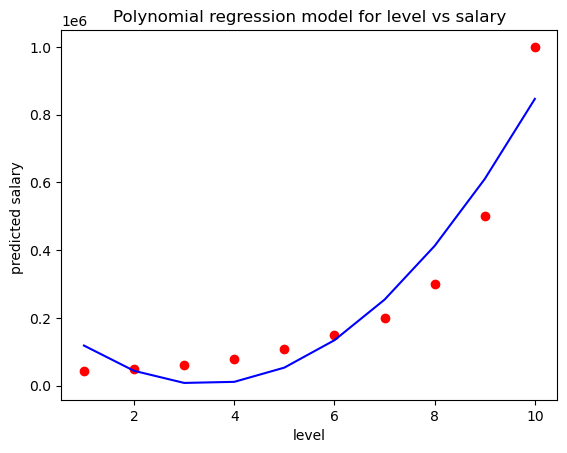

In [26]:
polynomial_pred = lr2.predict(X_poly)

plt.scatter(X , y , color = 'red') #plot of the real levels and actual salaries for linear model
plt.plot(X, polynomial_pred , color = 'blue') 
plt.title('Polynomial regression model for level vs salary')
plt.xlabel('level')
plt.ylabel('predicted salary ')

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


Text(0, 0.5, 'predicted salary ')

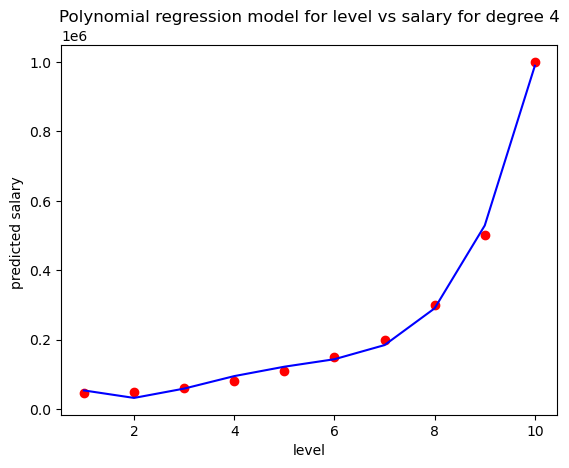

In [27]:
#we can also train the model using highter degreee like 4
pf4 = PolynomialFeatures(degree = 4)
X_poly_4 = pf4.fit_transform(X)
print(X_poly_4)
lr4 = LinearRegression()
lr4.fit(X_poly_4,y)
polynomial_pred_4 = lr4.predict(X_poly_4)


plt.scatter(X , y , color = 'red') #plot of the real levels and actual salaries for linear model
plt.plot(X, polynomial_pred_4 , color = 'blue') 
plt.title('Polynomial regression model for level vs salary for degree 4' )
plt.xlabel('level')
plt.ylabel('predicted salary ')

In [28]:
#now we to predit the salary of level 6.5 both with linear model, polynomial with 2 ,polynomial 4
lr.predict([[6.5]])

array([330378.78787879])

In [35]:
lr2.predict(pf.fit_transform([[6.5]]))

array([189498.10606061])

In [36]:
lr4.predict(pf4.fit_transform([[6.5]]))

array([158862.45265153])

In [37]:
#hence the salary of level 6.5 is around 158862